<a href="https://colab.research.google.com/github/CODSOFT-DS/Task-1/blob/main/Titanic_survival_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Load dataset
file_path = "TitanicDataset.csv"
df = pd.read_csv(file_path)



In [3]:
df.columns


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
# load columns
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df=df.drop(columns=["PassengerId","Name","SibSp","Parch","Ticket","Cabin","Embarked"])


In [6]:

df.head()




,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [7]:
df.describe()


,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


In [8]:
df.isnull().sum()


,0
Survived,0
Pclass,0
Sex,0
Age,177
Fare,0


In [9]:
df["Fare"].fillna(df["Fare"].mean(),inplace=True)


<ipython-input-9-d2432ea68a4a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Fare"].fillna(df["Fare"].mean(),inplace=True)


In [10]:
df["Fare"].isnull().sum()



np.int64(0)

In [11]:
Age_df=df[["Survived","Pclass","Age","Fare"]]



In [12]:
with_null=Age_df[Age_df["Age"].isnull()]
without_null=Age_df[Age_df["Age"].notna()]



In [13]:
with_null.describe()



,Survived,Pclass,Age,Fare
count,177.000000,177.000000,0.0,177.000000
mean,0.293785,2.598870,NaN,22.158567
std,0.456787,0.763216,NaN,31.874608
min,0.000000,1.000000,NaN,0.000000
25%,0.000000,3.000000,NaN,7.750000
50%,0.000000,3.000000,NaN,8.050000
75%,1.000000,3.000000,NaN,24.150000
max,1.000000,3.000000,NaN,227.525000


In [14]:
without_null.describe()



,Survived,Pclass,Age,Fare
count,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,34.694514
std,0.491460,0.838250,14.526497,52.918930
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,1.000000,20.125000,8.050000
50%,0.000000,2.000000,28.000000,15.741700
75%,1.000000,3.000000,38.000000,33.375000
max,1.000000,3.000000,80.000000,512.329200


In [15]:
from sklearn.linear_model import LinearRegression


In [16]:
age_prediction=LinearRegression()
age_prediction.fit(without_null.drop("Age",axis=1),without_null['Age'])



LinearRegression()

In [17]:
result_age_prediction=age_prediction.predict(with_null.drop("Age",axis=1))


In [18]:
result_age_prediction



array([26.4695118 , 28.60608629, 19.69770102, 26.51478941, 19.67368366,
       26.49016262, 32.82459482, 19.67842692, 19.69754683, 26.49016262,
       26.48450154, 26.21099289, 19.67842692, 25.98413857, 36.90045382,
       44.00313664, 19.40323683, 26.49016262, 26.48450154, 19.6770502 ,
       26.48450154, 26.48450154, 26.49016262, 19.67750911, 19.07634076,
       26.48450154, 26.49551531, 19.14211867, 26.22032522, 26.51157706,
       26.46201509, 24.22667843, 36.18455868, 44.06906507, 25.84508971,
       24.22667843, 35.34791391, 43.18520993, 19.3939045 , 26.49551531,
       19.67842692, 24.22667843, 26.49551531, 26.49016262, 25.84508971,
       26.50285783, 26.24938689, 19.3939045 , 26.5138716 , 35.29611446,
       26.49551531, 26.49551531, 43.88274878, 19.67842692, 35.90043811,
       44.06631163, 44.00313664, 37.08401667, 19.67842692, 19.10938207,
       28.62994947, 26.48450154, 34.13293906, 24.22667843, 19.10938207,
       33.29711497, 26.49016262, 19.37187695, 43.73589849, 26.51

In [19]:
df.loc[df["Age"].isnull(), "Age"]=result_age_prediction


In [20]:
df.isnull().sum()



,0
Survived,0
Pclass,0
Sex,0
Age,0
Fare,0


In [21]:
df.head()



,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [22]:
average_age_of_surived=df["Age"].mean()
print(average_age_of_surived)



29.286540260517498


In [ ]:
df['Sex_Encoded'] = df['Sex'].map({"male":1,"female":2})


In [23]:
df.head()



,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [26]:
df['Sex_Encoded'] = df['Sex'].map({"male":1,"female":2})



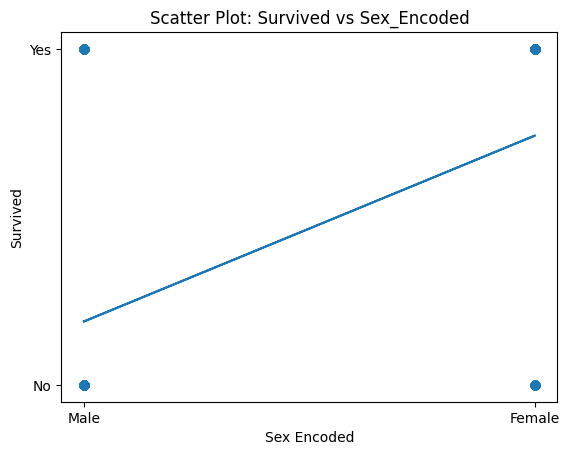

In [27]:
plt.scatter(df["Sex_Encoded"], df["Survived"])
z = np.polyfit(df['Sex_Encoded'],df['Survived'], 1)
p = np.poly1d(z)
plt.plot(df['Sex_Encoded'], p(df['Sex_Encoded']))

plt.xlabel('Sex Encoded')

plt.ylabel('Survived')

#Plot title
plt.title('Scatter Plot: Survived vs Sex_Encoded')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xticks([1,2], ['Male', 'Female'])
plt.show()